### 📥 1. Importing Libraries and Loading Data

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel("C:/Users/Manish/OneDrive/Desktop/IT Vedant/Exam FIle.xlsx")
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2013-152156,2013-11-09,2013-11-12,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.960,2,0.0,41.9136
1,2,CA-2013-152156,2013-11-09,2013-11-12,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.940,3,0.0,219.5820
2,3,CA-2013-138688,2013-06-13,2013-06-17,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.620,2,0.0,6.8714
3,5,US-2012-108966,2012-10-11,2012-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.368,2,0.2,2.5164
4,6,CA-2011-115812,2011-06-09,2011-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.860,7,0.0,14.1694


In [32]:
# Display basic information
print(df.describe())

            Row ID   Postal Code         Sales     Quantity     Discount  \
count  8058.000000   8058.000000   8058.000000  8058.000000  8058.000000   
mean   4967.272648  55016.047779    223.480623     3.794738     0.081044   
std    2872.723630  33295.003380    600.340641     2.244696     0.098884   
min       1.000000   1040.000000      0.990000     1.000000     0.000000   
25%    2483.250000  21843.250000     17.940000     2.000000     0.000000   
50%    4965.000000  53711.000000     50.965000     3.000000     0.000000   
75%    7427.250000  90045.000000    191.976000     5.000000     0.200000   
max    9994.000000  99301.000000  17499.950000    14.000000     0.400000   

            Profit         Year  
count  8058.000000  8058.000000  
mean     54.917884  2012.725118  
std     213.713980     1.123067  
min       0.062800  2011.000000  
25%       5.324550  2012.000000  
50%      13.317600  2013.000000  
75%      40.465550  2014.000000  
max    8399.976000  2014.000000  


In [33]:
#Checking for any missing value in dataset
print(df.isnull().sum())

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
Year             0
dtype: int64


In [4]:
# Convert date columns to datetime format for better visualization

df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

In [17]:
# Sales and Profit Analysis by Category 

category_summary = df.groupby(['Category'])[['Sales', 'Profit']].sum().sort_values(by='Sales', ascending=False)
print("\nSales and Profit by Category:\n")
print(category_summary)


Sales and Profit by Category:

                       Sales       Profit
Category                                 
Technology       716701.1480  184034.8663
Office Supplies  618988.7490  179106.0593
Furniture        465116.9615   79387.3818


In [19]:
# Sales and Profit Analysis by Sub-Category  

sub_category_summary = df.groupby(['Sub-Category'])[['Sales', 'Profit']].sum().sort_values(by='Sales', ascending=False)
print("\nSales and Profit by Category:\n")
print(sub_category_summary)


Sales and Profit by Category:

                    Sales      Profit
Sub-Category                         
Phones        293993.8940  52046.3541
Chairs        220870.1410  36471.0076
Storage       177559.3380  27705.1302
Binders       167272.1200  68732.2597
Accessories   156396.8460  42867.2622
Copiers       149528.0300  55617.8249
Machines      116782.3780  33503.4251
Appliances    104149.6270  26767.6466
Tables        100983.3330  14686.6672
Paper          78479.2060  34053.5693
Furnishings    76896.5440  19550.0570
Bookcases      66366.9435   8679.6500
Supplies       32606.3620   1826.5224
Art            27118.7920   6527.7870
Envelopes      16476.4020   6964.1767
Labels         12486.3120   5546.2540
Fasteners       2840.5900    982.7134


In [27]:
# 4. Date-based Trend Analysis for Sales and Profit

df['Year'] = df['Order Date'].dt.year
trend = df.groupby('Year')[['Sales', 'Profit']].sum()
print("\nYearly Sales and Profit Trends:\n")
print(trend)



Yearly Sales and Profit Trends:

            Sales       Profit
Year                          
2011  351519.0540   81436.7458
2012  374714.0035   94147.9946
2013  495348.9405  119564.6453
2014  579224.8605  147378.9217


In [23]:
# Regional wise Performance
region_segment= df.groupby(['Region'])[['Sales', 'Profit']].sum()
print("\nSales and Profit by Region :\n")
print(region_segment)



Sales and Profit by Region :

               Sales       Profit
Region                           
Central  355822.9170   96021.2475
East     509215.9260  141113.3875
South    294021.3920   74254.2626
West     641746.6235  131139.4098


In [24]:
# Segment-wise Performance
segment= df.groupby(['Segment'])[['Sales', 'Profit']].sum()
print("\nSales and Profit by Segment:\n")
print(segment)



Sales and Profit by Segment:

                   Sales       Profit
Segment                              
Consumer     895785.9910  219064.9204
Corporate    568564.0255  136766.3416
Home Office  336456.8420   86697.0454


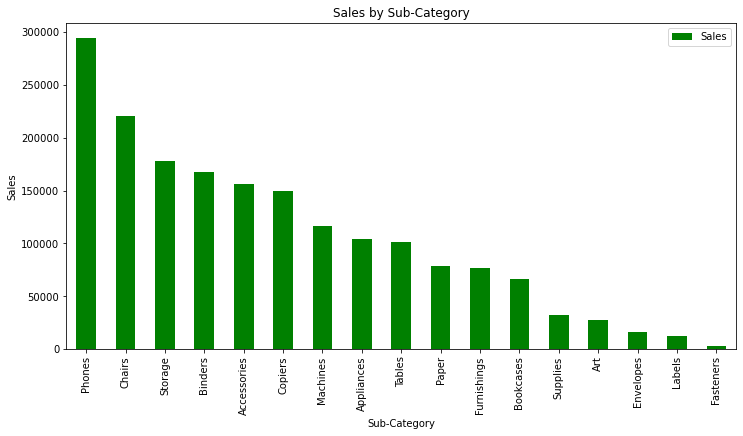

In [31]:
# Sales by Sub-Category

plt.figure(figsize=(12, 6))
category_summary['Sales'].plot(kind='bar', color='green', label='Sales')
plt.title('Sales by Sub-Category')
plt.xlabel('Sub-Category')
plt.ylabel('Sales')
plt.xticks(rotation=90)
plt.legend()
plt.show()


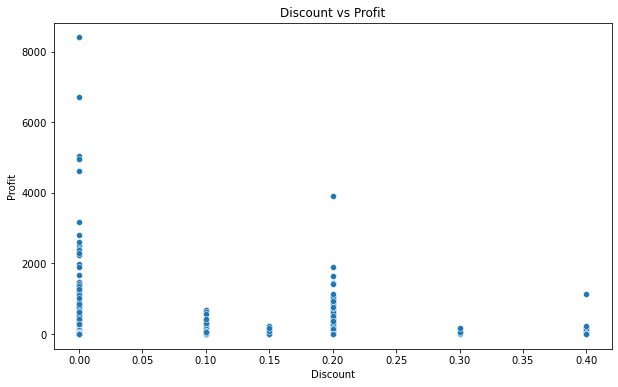

In [25]:
# Impact of Discount on Profit

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Discount', y='Profit', data=df)
plt.title('Discount vs Profit')
plt.xlabel('Discount')
plt.ylabel('Profit')
plt.show()

<Figure size 720x432 with 0 Axes>

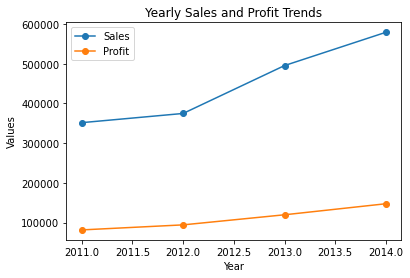

In [29]:
# Yearly trends for sales and profit

plt.figure(figsize=(10, 6))
time_series.plot(kind='line', marker='o')
plt.title('Yearly Sales and Profit Trends')
plt.xlabel('Year')
plt.ylabel('Values')
plt.legend(['Sales', 'Profit'])
plt.show()

In [11]:
# Summary: Provide key insights from the data

print("1. Top categories/sub-categories by sales are:")
print(category_summary.head(5))

print("\n2. Regions and segments with the highest performance are:")
print(region_segment_summary.loc[region_segment_summary['Sales'].idxmax()])
print("\n3. Discounts above a certain level tend to reduce profit.")
print("\n4. Sales and profit trends over the years:")
print(time_series)


Key Insights:

1. Top categories/sub-categories by sales are:
                                   Sales      Profit
Category        Sub-Category                        
Technology      Phones        293993.894  52046.3541
Furniture       Chairs        220870.141  36471.0076
Office Supplies Storage       177559.338  27705.1302
                Binders       167272.120  68732.2597
Technology      Accessories   156396.846  42867.2622

2. Regions and segments with the highest performance are:
Sales     318744.9720
Profit     67345.9566
Name: (West, Consumer), dtype: float64

3. Discounts above a certain level tend to reduce profit.

4. Sales and profit trends over the years:
            Sales       Profit
Year                          
2011  351519.0540   81436.7458
2012  374714.0035   94147.9946
2013  495348.9405  119564.6453
2014  579224.8605  147378.9217
